# Wall

In [13]:
import CairoMakie: update_theme!

using Revise
using MMJMesh
using MMJMesh.Meshes
using MMJMesh.Plots
using LinearAlgebra
using SparseArrays

include("fem.jl")
include("heat.jl")
update_theme!(colormap=:acton)

## Parameters

In [8]:
ti = 20
hi = 1 / 0.13
ta = -10
ha = 1 / 0.04

25.0

## Mesh

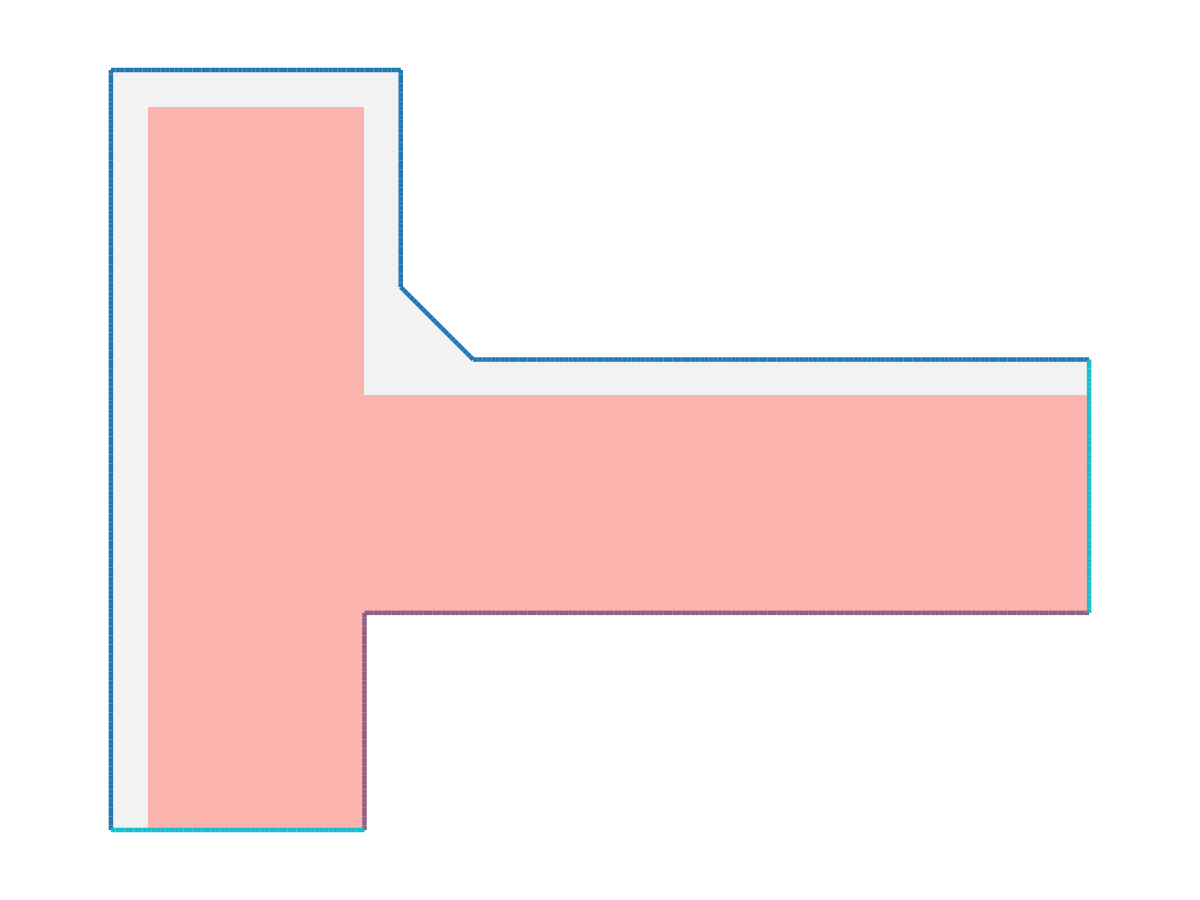

In [9]:
m = Mesh("gmsh/attika.msh")
mplot(m) |> mconf()

## Solution

### Define problem

In [10]:
m.data[:kefunc, :sd] = heatKe(0.01)
m.data[:kefunc, :sc] = heatKe(0.7)
m.data[:kefunc, :wi] = robinKe(hi)
m.data[:refunc, :wi] = robinRe(hi, ti)
m.data[:kefunc, :wa] = robinKe(ha)
m.data[:refunc, :wa] = robinRe(ha, ta);

### Set up and solve linear system

In [17]:
@time K, r = assembleKr(m);
@time θHat =  sparse(K) \ r;
size(K)

  2.548794 seconds (11.31 M allocations: 4.305 GiB, 10.63% gc time)
  2.050231 seconds (73 allocations: 25.615 MiB, 3.56% gc time)


(22857, 22857)

## Results

### Temperature distribution

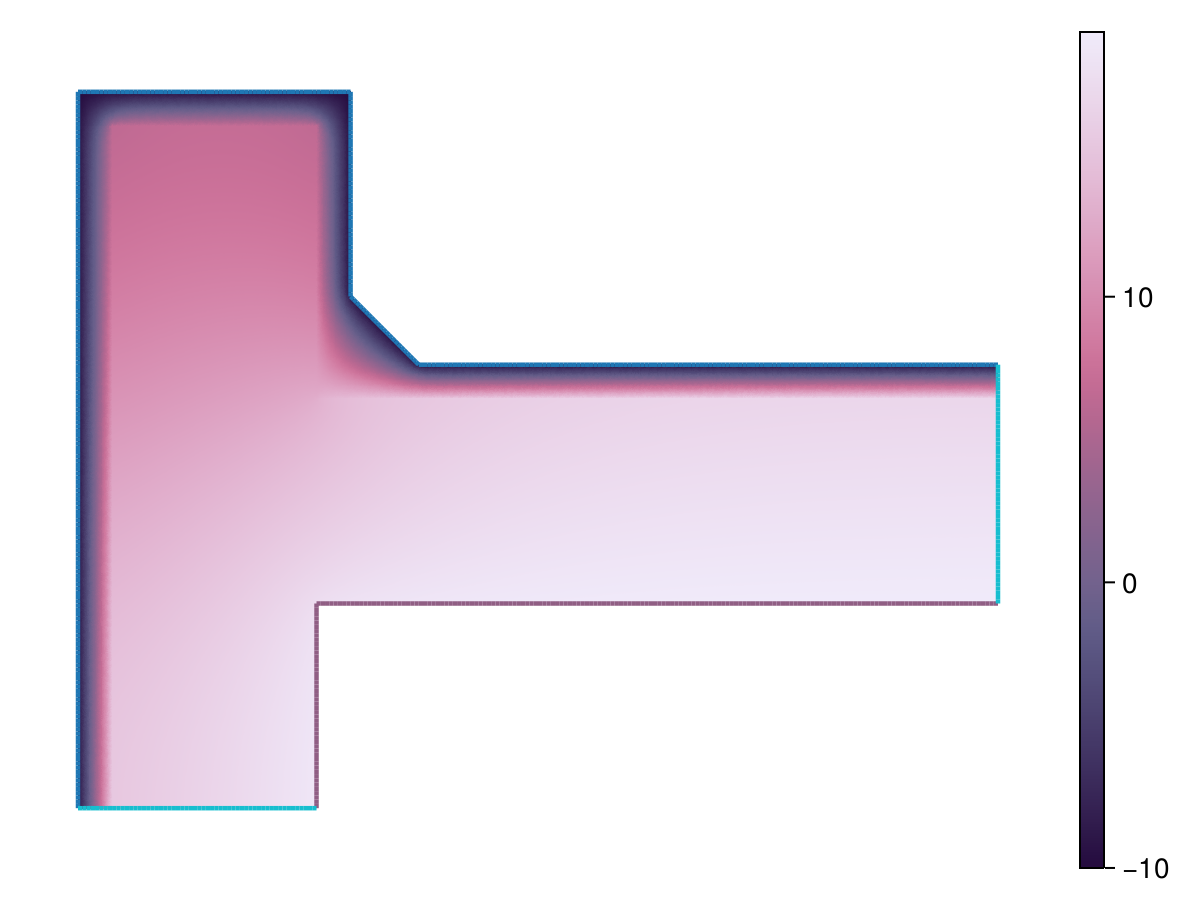

In [18]:
mplot(m, θHat) |> mconf()